<a href="https://colab.research.google.com/github/Shrez7961/Practice/blob/main/Assignment_Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### <u> Tasks </u>
* ### Validate all the assumptions
* ### Compute all the regression evaluation metrics
* ### Comment on the best evaluation metrics for this problem

In [125]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Module 4: Machine Learning/LR Implementation/50_Startups.csv')

In [128]:
len(dataset)

50

In [129]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [130]:
dataset.shape

(50, 5)

In [131]:
lst = ['R&D Spend',	'Administration','Marketing Spend',	'State',	'Profit']

**Lets do some Exploratory Data Analysis on the dataset**

Text(0.5, 1.0, 'Scatter Plot of Profit with Marketing Spend')

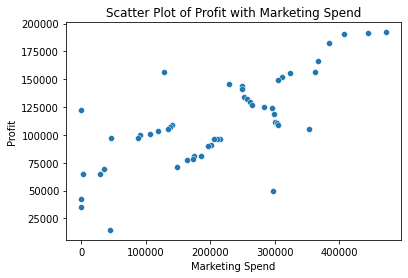

In [132]:
sns.scatterplot(data = dataset, x="Marketing Spend", y = "Profit")
plt.title("Scatter Plot of Profit with Marketing Spend")

Text(0.5, 1.0, 'Scatter Plot of Profit with R&D Spend')

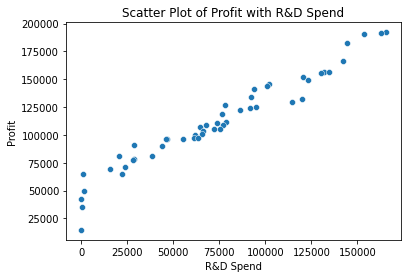

In [133]:
sns.scatterplot(data = dataset, x="R&D Spend", y = "Profit")
plt.title("Scatter Plot of Profit with R&D Spend")

Text(0.5, 1.0, 'Scatter Plot of Profit with Administration')

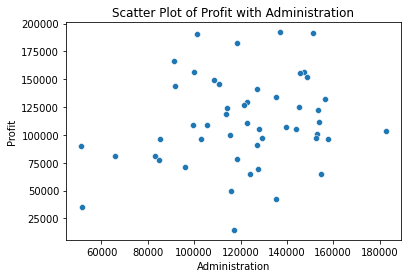

In [134]:
sns.scatterplot(data = dataset, x="Administration", y = "Profit")
plt.title("Scatter Plot of Profit with Administration")

Text(0.5, 1.0, 'Average Profit for different State')

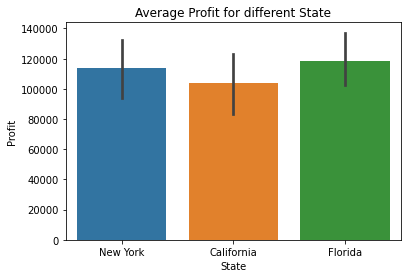

In [135]:
sns.barplot(data = dataset, x="State", y = "Profit")
plt.title("Average Profit for different State")

Lets check Correlation between the variables

In [136]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [137]:
#Creating dummy variables for the categorical variable state
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

In [138]:
# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [139]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [140]:
#Creating dependent & Independent variable list
dv = 'Profit'
idv = list(set(dataset.columns.tolist()) - {dv})
idv

['California_State',
 'R&D Spend',
 'Administration',
 'Florida_State',
 'Marketing Spend',
 'NewYork_State']

In [141]:
dv

'Profit'

In [142]:
correlation = dataset.corr()

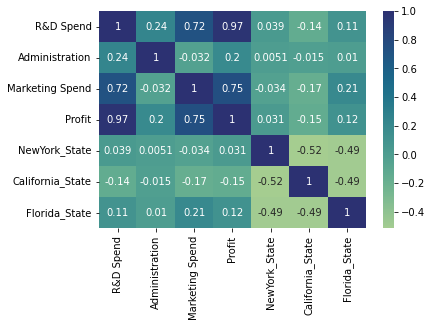

In [143]:
sns.heatmap(correlation, annot = True, cmap = 'crest')

In [166]:
# Create the data of independent variables
X = dataset[idv].values

# Create the dependent variable data
y = dataset[dv].values

In [167]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [168]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [170]:
X_train[0:10]

array([[0.        , 0.33561668, 0.48655174, 1.        , 0.45494286,
        0.        ],
       [0.        , 0.2782839 , 0.3173015 , 0.        , 0.43561799,
        1.        ],
       [0.        , 0.45557444, 0.87258866, 1.        , 0.28413435,
        0.        ],
       [1.        , 0.2807759 , 1.        , 0.        , 0.44680961,
        0.        ],
       [0.        , 0.55488118, 0.59103645, 1.        , 0.62511553,
        0.        ],
       [0.        , 0.7880179 , 0.88568959, 1.        , 0.68649342,
        0.        ],
       [0.        , 0.72539353, 0.98922572, 1.        , 0.54370828,
        0.        ],
       [0.        , 0.0060492 , 0.6847981 , 0.        , 0.0040356 ,
        1.        ],
       [0.        , 0.00327821, 0.00432296, 0.        , 0.        ,
        1.        ],
       [0.        , 0.39676926, 0.95618996, 0.        , 0.22709197,
        1.        ]])

In [171]:
#Fitting Multiple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [172]:
regressor.intercept_

44153.95466784863

In [178]:
regressor.coef_

array([ 8.66383692e+01,  1.27892182e+05,  3.49927567e+03, -8.72645791e+02,
        1.72720281e+04,  7.86007422e+02])

In [181]:
y_pred_train = regressor.predict(X_train)
y_pred_train 


array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [182]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [173]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [183]:
#Actual Profiits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [151]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.9901527987

In [152]:
r2_score(y_test, y_pred)

0.9347068473281888